# Floats : Coercing to Integers

Different ways to convert Floats to int:
* truncation
* floor
* ceiling
* rounding

*data loss in all cases*

### Truncation

truncation a float simply returns the **integer potion** of the number

In [1]:
import math
math.trunc(10.23)

10

### Floor

the *floor* of a number is the **largest** integer **less** than (or equal to) the number

In [2]:
import math
math.floor(-3.000000001)

-4

In [5]:
math.floor(-3.0000000000000001) #Takes as 3 because of loss of precision

-3

### Ceiling

the *ceiling* of a number is the **smallest** integer **greater** than (or equal to) the number

In [7]:
math.ceil(10.15)

11

In [8]:
math.ceil(-10.15)

-10

# Floats: Rounding

The **round()** function:

Python provides built in rounding fucntion: *round(x, n=0)*  
This will round the number **x** to the closest multiple of $10^{-n}$  
&emsp;&emsp;We may assume that, *n* as the number of digits after decimal to be rounded of.  
&emsp;&emsp;This is correct but only when *n* is **postivie**, but*n* can also be **negative**

In addition to truncate, floor and ceiling discussed above, we can therefore also use rounding (with n=0) to coerce float to int.

*Important:*

&emsp;&emsp; round(x) &emsp;&emsp;&emsp; --> &emsp;&emsp; **int**  
&emsp;&emsp; round(x, n) &emsp;&emsp; -->&emsp;&emsp; **same type as x**  
&emsp;&emsp; round(x, 0) &emsp;&emsp; -->&emsp;&emsp; **same type as x**  

**n = 0**  
*n = 0*, roubnd to the closest multiple og **$10^{-0} = 1$**
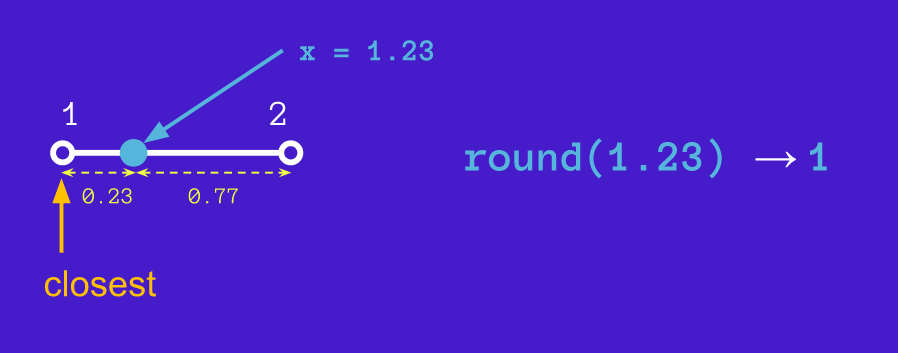

In [4]:
a = round(1.23)
b = round(1.23, 0)
a, type(a), b, type(b)

(1, int, 1.0, float)

**n > 0**  
*n = 1*, roubnd to the closest multiple og **$10^{-1} = 0.1$**
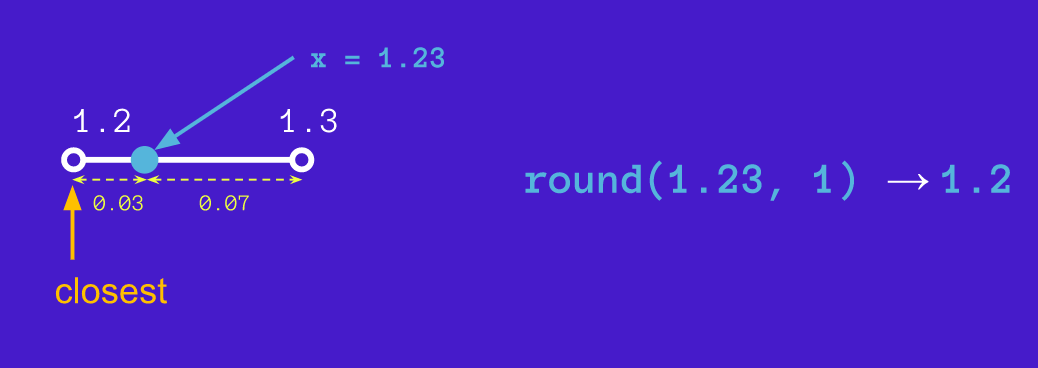

In [2]:
a = round(1.23, 1)
a, type(a)

(1.2, float)

**n < 0**  
*n = -1*, roubnd to the closest multiple og **$10^{-(-1)} = 10$**
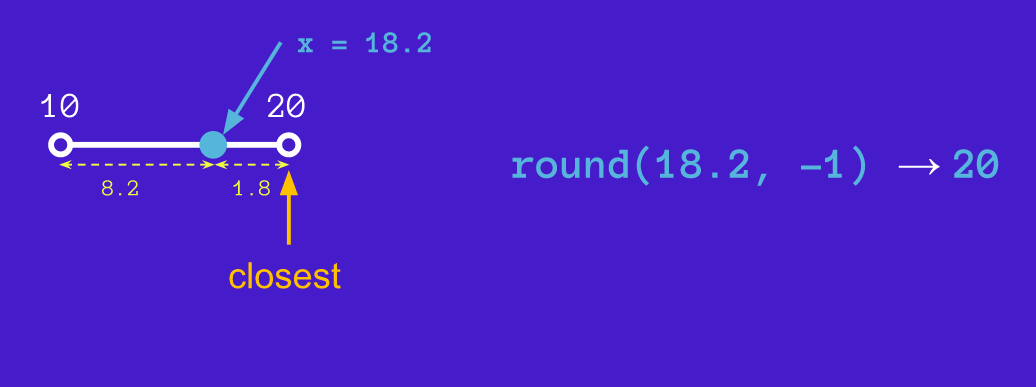

In [3]:
a = round(18.2, -1)
a, type(a)

(20.0, float)

## Ties

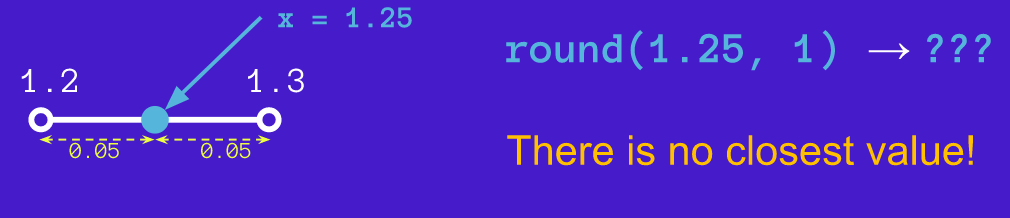

We, probably would expect **round(1.25, 1)** to be **1.3** &emsp;&emsp; *rounding up / away from zero*  
Similarly, we would expect **round(-1.25, 1)** to be **-1.3**&emsp;&emsp; *rounding down / away from zero*

This type of rounding is called *rounding to nearest with ties **away from zero**.*

In [6]:
#But in fact:
print('1.25 is rounded to: ',round(1.25, 1), 'towards 0')
print('1.35 is rounded to: ',round(1.35, 1), 'away from 0')
print('-1.25 is rounded to: ',round(-1.25, 1), 'towards 0')
print('-1.35 is rounded to: ',round(-1.35, 1), 'away from 0')

1.25 is rounded to:  1.2 towards 0
1.35 is rounded to:  1.4 away from 0
-1.25 is rounded to:  -1.2 towards 0
-1.35 is rounded to:  -1.4 away from 0


## Banker's Rounding

IEEE 754 standard: rounds to the nearest value with the ties rounded to the nearest value with an even least significant digit.

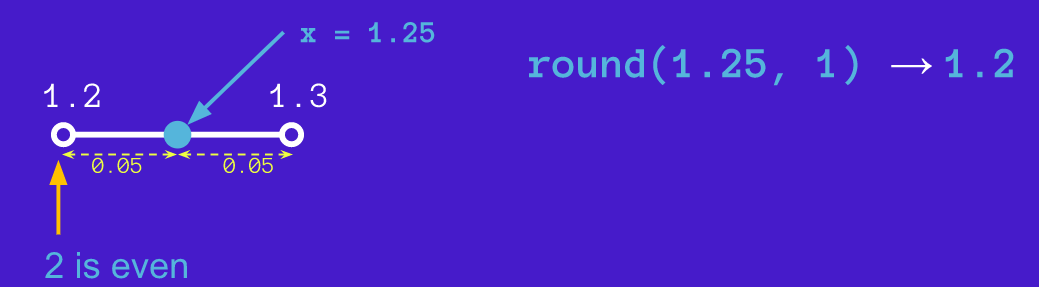

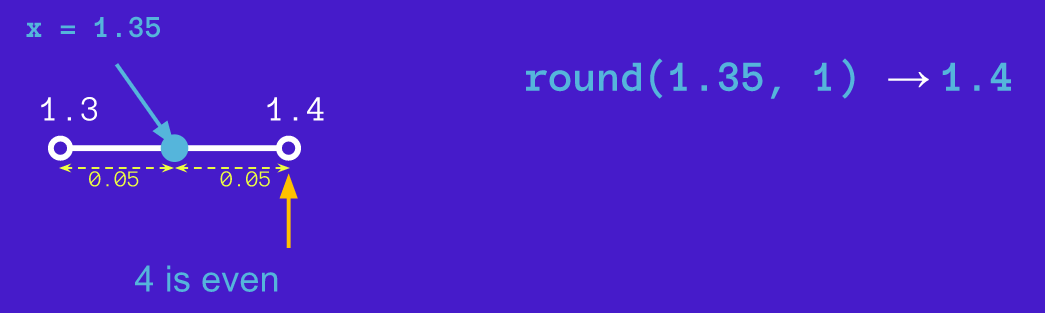

In [7]:
#Similary when n=-1, it rounds to the closes multiple of 10(even digit at tens place).
print('15 is rounded to: ',round(15,-1))
print('25 is rounded to: ',round(25,-1))

15 is rounded to:  20
25 is rounded to:  20


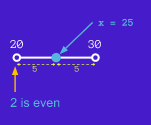 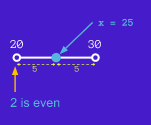

If for some reason, we need to round way from zero for all cases, then:

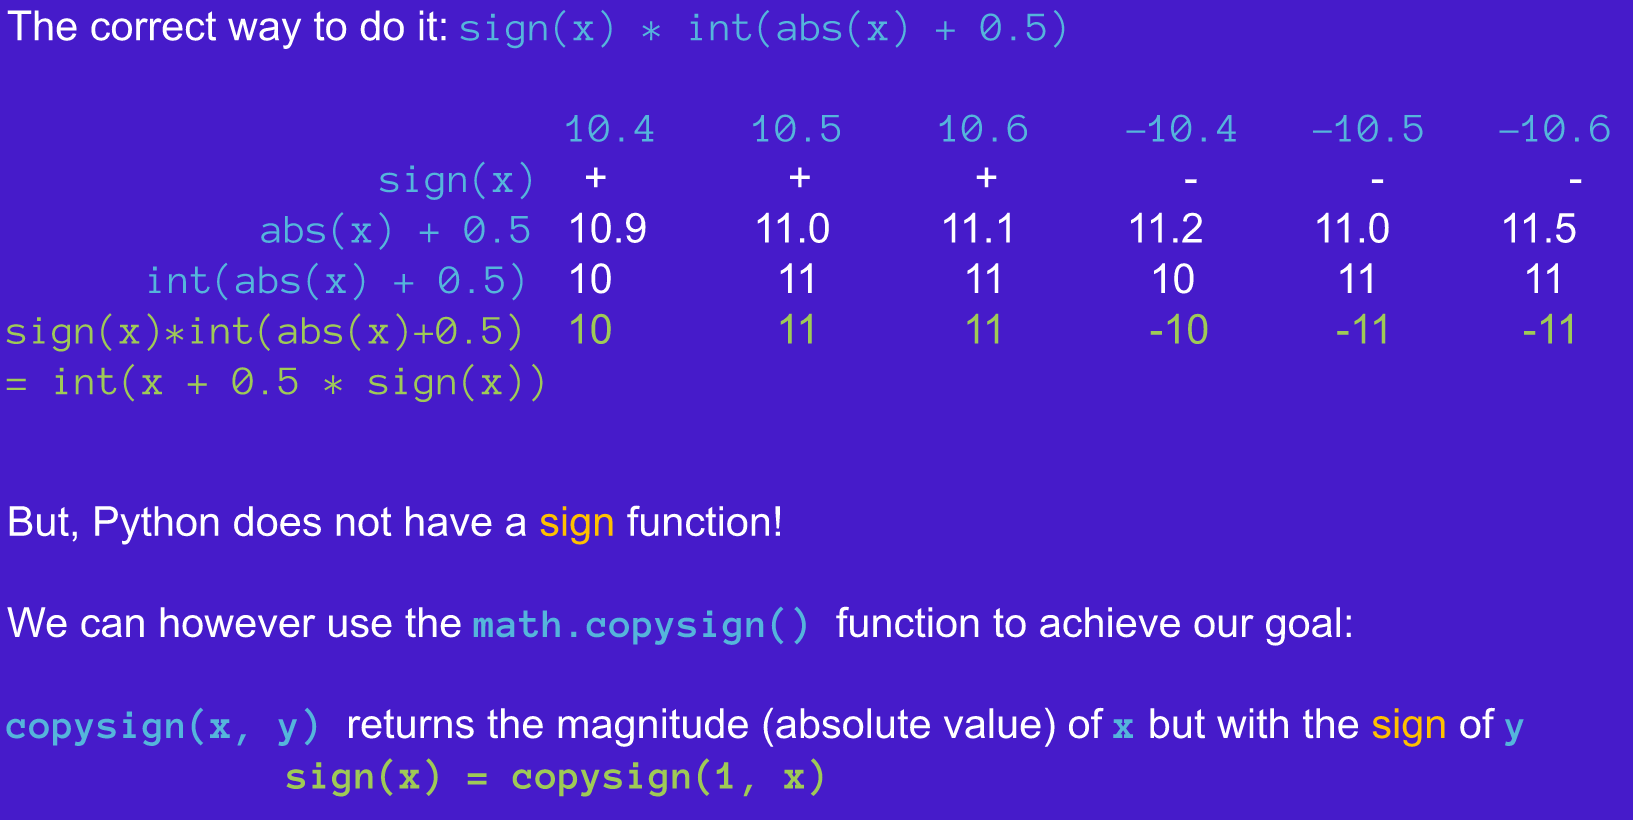

In [8]:
#sign(x) * int(abs(x)+0.5)
def round_up(x):
    from math import fabs, copysign
    return copysign(1,x) * int(fabs(x)+0.5)
#OR

# int(x + 0.5 * sign(x))
def round_up(x):
    from math import fabs, copysign
    return int(x + copysign(0.5,x))

In [30]:
help(float)

Help on class float in module builtins:

class float(object)
 |  float(x=0, /)
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(self, format_spec, /)
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __int__(self, /)
 |      int(sel

In [31]:
float(10)

10.0

In [32]:
format(float('0.1'), '0.25f')

'0.1000000000000000055511151'

In [34]:
float('22/7')

ValueError: could not convert string to float: '22/7'

In [35]:
from fractions import Fraction
a = Fraction('22/7')
float(a)

3.142857142857143

In [37]:
print(0.1) #Pythion is a Liar

0.1


In [39]:
format(0.125, '0.25f')

'0.1250000000000000000000000'

In [40]:
a = 0.1 + 0.1 + 0.1
b = 0.3

a == b

False

In [41]:
format(a, '0.25f')

'0.3000000000000000444089210'

In [42]:
format(b, '0.25f')

'0.2999999999999999888977698'

In [9]:
x = 0.1
print(x)
print(format(x, '0.25f'))

0.1
0.1000000000000000055511151


In [11]:
x = 0.125 + 0.125 + 0.125
y = 0.375
x == y

True

In [12]:
# how to we compare floats?

round(x, 99) == round(y, 99) # this is absolute tolerance method

True

In [13]:
x = 0.1 + 0.1 + 0.1 
y = 0.3 
print(round(x, 2) == round(y, 2))

a = 0.001
b = 0.002
print(round(a, 2) == round(b, 2))

True
True


Since we rounded of **x** and **y** to two decimal digits, the equal is coming True, which is exactly what we want.
But the value **a** and **b** are clearly not equal, here a is clearly half of b. But using the same 2 in round is giving true, where as it must be false,

So, lets increate the precision of rounding to 20 digits after decimal.

In [14]:
x = 0.1 + 0.1 + 0.1 
y = 0.3 
print(round(x, 20) == round(y, 20))

a = 0.001
b = 0.002
print(round(a, 20) == round(b, 20))

False
False


So, here **a** and **b** are not equal, but again **x** and **y** must have been equal, since we used large precision it gave False.

So we can't directly use round.

In [15]:
from math import isclose
help(isclose)

Help on built-in function isclose in module math:

isclose(a, b, *, rel_tol=1e-09, abs_tol=0.0)
    Determine whether two floating point numbers are close in value.
    
      rel_tol
        maximum difference for being considered "close", relative to the
        magnitude of the input values
      abs_tol
        maximum difference for being considered "close", regardless of the
        magnitude of the input values
    
    Return True if a is close in value to b, and False otherwise.
    
    For the values to be considered close, the difference between them
    must be smaller than at least one of the tolerances.
    
    -inf, inf and NaN behave similarly to the IEEE 754 Standard.  That
    is, NaN is not close to anything, even itself.  inf and -inf are
    only close to themselves.



In [16]:
x = 0.1 + 0.1 + 0.1
y = 0.3
isclose(x, y)

True

In [19]:
x = 10000000000.01
y = 10000000000.02
#We want this equal, since difference(0.01) in relatively is very minute.
isclose(x, y, rel_tol=0.01)

True

In [20]:
x = 0.01
y = 0.02
#The difference is same as above(0.01) but relatively its double.
#So we want x and y not equal(close)
isclose(x, y, rel_tol=0.01)

False

In [31]:
x = 0.00000000000001
y = 0.00000000000002
#Sometimes, even if the difference is double, we won't care if it's after some particular
#number of digits. So we want them to be same after some x particular digits
isclose(x, y, rel_tol=0.01)

False

Here, the difference is double, but the numbers are so small that we want them to be same.

Hence here we use absolute difference.

In [32]:
isclose(x, y, rel_tol=0.01, abs_tol=0.01)

True

siclose function takes the maximum of either **rel_tol*max(a,b)** or **abs_tol**

### Revising trunc, floor and ceil

In [50]:
from math import trunc
trunc(10.3), trunc(10.5), trunc(10.9999)

(10, 10, 10)

In [34]:
from math import floor
floor(10.3), floor(10.5), floor(10.9)

(10, 10, 10)

Oh!!!!!!!!!!! trunc and floor are one and the same.

In [57]:
trunc(-10.3), trunc(-10.5), trunc(-10.9999)

(-10, -10, -10)

In [58]:
floor(-10.3), floor(-10.5), floor(-10.9)

(-11, -11, -11)

buhahahaha.......You are wrong!! *trunc* and *floor* are not same.

They may give same results for **positive numbers**, but the whole game is reverse in case of **negative numbers**

In [61]:
from math import ceil

ceil(10.3), ceil(10.5), ceil(10.9) 

(11, 11, 11)

In [62]:
ceil(-10.3), ceil(-10.5), ceil(-10.9) 

(-10, -10, -10)

In [63]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



In [64]:
a = round(1.9)
a, type(a)

(2, int)

In [65]:
a = round(1.9, 0)
a, type(a)

(2.0, float)

In [66]:
round(1.88888, 3), round(1.88888, 2), round(1.88888, 1), round(1.88888, 0)

(1.889, 1.89, 1.9, 2.0)

In [71]:
round(888.88, 1), round(888.88, 0), round(888.88, -1), \
round(888.88, -2), round(888.88, -3), round(888.88, -4)

(888.9, 889.0, 890.0, 900.0, 1000.0, 0.0)

In [72]:
round(5001, -4)

10000

In [73]:
round(1.25, 1)

1.2

In [74]:
format(1.25, '0.25f')

'1.2500000000000000000000000'

In [80]:
format(1.55, '0.25f')

'1.5500000000000000444089210'

In [82]:
round(1.55,1)

1.6

For some numbers which are not having exact representation in flaot. Are not the cases of **ties**, since the distances between end points and the number are not same and the number gets rounded off according to the distance.

In [37]:
round(11.35, 1)

11.3

Hey, it should have been **rounded to 11.4 not 11.3**. You are cheating........

Sorry....but wait....let's check what is the exact representation of 11.35

In [38]:
format(11.35, '0.25f')

'11.3499999999999996447286321'

Here we can see that, 11.35 is not 11.35 and is actually less than that, which means it's closes to 11.3.  
Hence, rounding it to 1 decimal gives 11.3 instead of even number(11.4)

In [39]:
round(-1.25, 1), round(-1.35, 1)

(-1.2, -1.4)

## Quiz

In [40]:
True + True

2

In [41]:
True/2

0.5

In [42]:
bool(True/2)

True

In [43]:
bool([])

False

In [44]:
bool('False')

True

# Decimals

From our last session, we saw that float has **infinite binary expansion** for some numbers.

float 0.1 -> $ (0.1)_{10} = (0.0 0011 0011 0011 .....)_2 $
$  = (\frac{0}{2} + \frac{0}{4} + \frac{0}{8} + \frac{1}{16} +  \frac{1}{32} + \frac{0}{64} + \frac{0}{128} + \frac{1}{256} +  \frac{1}{512} + \frac{0}{1024} + \frac{0}{2048} + \frac{1}{4096} +  \frac{1}{8192} + ....) $

But it has a finite decimal expression $(0.1)_{10} = \frac{1}{10}$

### But Why do we even care??

In [60]:
#Assume our stock price is $100.01
stock = 100.01
number_of_transactions = 1000000000 #1 Billion

print('Stored Price of Stock in Programming: ',format(stock, '0.25f'))

Stored Price of Stock in Programming:  100.0100000000000051159076975


expected sum = \\$1000010000000.00  
calculated sum = \\$1000009998761.1463928222656250000000

Difference is **\\$1238.85**. And just due to floating point precision error, we lost $1238.85

Decimals have a **context** that controls certain aspects of working with decimals.  
&emsp;&emsp;**precision** during arthimetic operartions  
&emsp;&emsp;**rounding**

This context can be global &emsp;&emsp; --> the **default** context  
&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;or (local) &emsp;&emsp;--> sets temporary settings without affecting the global settings

In [2]:
import decimal
from decimal import Decimal

In [17]:
decimal.getcontext() #Getting the Global context here.

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [18]:
decimal.getcontext().prec #Getting precision of global context

28

In [19]:
decimal.getcontext().rounding #Getting rounding algortihm of global context

'ROUND_HALF_EVEN'

In [20]:
type(decimal.getcontext())

decimal.Context

In [21]:
decimal.getcontext().prec = 6
g_ctx = decimal.getcontext()

In [22]:
g_ctx

Context(prec=6, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [23]:
g_ctx.rounding = 'ROUND_HALF_UP' # we might do spelling mistake here.. better would be
g_ctx.rounding = decimal.ROUND_HALF_UP

In [26]:
g_ctx

Context(prec=6, rounding=ROUND_HALF_UP, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [28]:
#Setting back g_ctx to global settings.
g_ctx.prec = 28
g_ctx.rounding = decimal.ROUND_HALF_EVEN
g_ctx

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [29]:
decimal.localcontext()

In [31]:
type(decimal.localcontext())

decimal.ContextManager

In [34]:
type(decimal.getcontext()), type(g_ctx)

(decimal.Context, decimal.Context)

In [33]:
with decimal.localcontext() as ctx:
    print(type(ctx)) #Local Context.
    print(ctx)

<class 'decimal.Context'>
Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])


In [3]:
with decimal.localcontext() as ctx:
    ctx.prec = 6
    ctx.rounding = decimal.ROUND_HALF_UP
    print(ctx)
    # later
    print(decimal.getcontext()) #Context of this space, here it's Local.
    # later
    print(id(ctx) == id(decimal.getcontext()))

Context(prec=6, rounding=ROUND_HALF_UP, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
Context(prec=6, rounding=ROUND_HALF_UP, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
True


In [4]:
x = Decimal('1.25')
y = Decimal('1.35')

In [7]:
with decimal.localcontext() as ctx:
    ctx.prec = 6
    ctx.rounding = decimal.ROUND_HALF_UP
    print('Local Context')
    print(round(x, 1)) #rounding away from zero, goes up.
    print(round(y, 1)) #rounding away from zero, goes up.
print('Back in Global')
print(round(x, 1))
print(round(y, 1)) # round_half_even

Local Context
1.3
1.4
Back in Global
1.2
1.4


In [8]:
decimal.getcontext() #Global

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

# Decimals: Constructors and Contexts

### Constructing Decimal Objects

The Decimal class is in the module decimal

**Decimal(x)** to create decimals, here **x** can be variety of types

* integers &emsp;&emsp;&emsp; a = Decimal(10) -> 10
* other decimal as inputs
* string &emsp;&emsp;&emsp;&emsp; a = Decimal('0.1') -> 0.1
* tuples &emsp;&emsp;&emsp;&emsp;a = Decimal(1,(3,1,4,1,5), -4) -> -3.1415

* floats &emsp;&emsp;&emsp;&emsp;*yes, but really. why do you want to use floats???*

&emsp;&emsp;Decimal(x) -> 0.1000000000000000055511151  
Since 0.1 doesnt have exact binary floar representation, it can not be used to create an exact decimal representation of itself!

&emsp;&emsp;***So always use strings or tuples!!***

In [18]:
help(Decimal)

Help on class Decimal in module decimal:

class Decimal(builtins.object)
 |  Decimal(value='0', context=None)
 |  
 |  Construct a new Decimal object. 'value' can be an integer, string, tuple,
 |  or another Decimal object. If no value is given, return Decimal('0'). The
 |  context does not affect the conversion and is only passed to determine if
 |  the InvalidOperation trap is active.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |  
 |  __complex__(...)
 |  
 |  __copy__(...)
 |  
 |  __deepcopy__(...)
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floor__(...)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      Default object formatter.
 |

In [19]:
Decimal(10)

Decimal('10')

In [20]:
Decimal(-10)

Decimal('-10')

In [21]:
Decimal('10.1')

Decimal('10.1')

In [23]:
Decimal(10.1) #Fails the entire purpose of using Decimal

Decimal('10.0999999999999996447286321199499070644378662109375')

In [24]:
Decimal('-0.34')

Decimal('-0.34')

### Using the Tuple Constructor

**1.23** &emsp;&emsp;&emsp; --> &emsp; **+1.23** x $10^{-2}$  
**-1.23**&emsp;&emsp;&emsp; --> &emsp; **-1.23** x $10^{-2}$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;sign digits exponent

sign -> s  
digits -> d1,d2,d3..  
exponent -> exp

**decimal(s, (d1,d2,d3,..), exp)**  
&emsp;&emsp;&emsp;s(x) = 0 if x >= 0  
&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;1 if x < 0  

In [16]:
#Example --> -3.1415 -> (1, (3,1,4,1,5), -4)
a = Decimal((1, (3,1,4,1,5), -4)) # 1 represents the sign of the number
a

Decimal('-3.1415')

In [26]:
Decimal(0, (3, 1, 4, 1, 5), -4)

TypeError: function takes at most 2 arguments (3 given)

Care must be taken that, the input itself is a **tuple**

In [27]:
Decimal((0, (3, 1, 4, 1, 5), -4))

Decimal('3.1415')

In [28]:
Decimal(0.1) == Decimal('0.1')

False

### Context Precision and the Constructor

Context precision affects the **mathematical operations** and ***doesn't*** affect the constructor

In [30]:
decimal.getcontext().prec = 2
a = Decimal('0.12345')
b = Decimal('0.12345')
c = a + b
a, b, c

(Decimal('0.12345'), Decimal('0.12345'), Decimal('0.25'))

Even thoug hwe kept the precision as 2, the decimal degits after point is still 5 in case of **a** and **b**. But the precision is **2** in case of **c**, which is result of mathematical operation.

In [33]:
0.123123123123 + 0.123123123123

0.246246246246

In [39]:
decimal.getcontext().prec = 2
a = Decimal('0.123123123123')
b = Decimal('0.123123123123')
0.123123123123 + 0.123123123123, a+b

(0.246246246246, Decimal('0.25'))

In [42]:
decimal.getcontext().prec = 6
print(a + b)
with decimal.localcontext() as ctx:
    ctx.prec = 2 # doesn't effect precision of the contructor
    c = a + b
    print('c within local context: {0}'.format(c))
print('c within global context: {0}'.format(c))

new_c = a+b
print('new_c calculated in global context: {0}'.format(new_c))

0.246246
c within local context: 0.25
c within global context: 0.25
new_c calculated in global context: 0.246246


We see that in global context **c** is with precision 2 only, and even if the global context is 6. the precision remained 2.

**Improtant:** Even if the precision is changed it doesn't automatically change the precision of variables. So the c in local context(with prec=2), will remain the same c even in global context(with prec=6)

# Decimal: Math Operations

### Some arthemetic operators don't work the same as floats or integers.

**//** amd **%** --> also divmod()

The **//** and **%** operator will satisfy the usual equations:

## n = d * (n *//* d) + (n *%* d)

But, But, But........  
for Integers/floats, the **//** the operator performs *floor* division -> a*//*b = **floor(a/b)**  
for Decimals, the **//** the operator performs *trunc* division -> a*//*b = **trunc(a/b)**

As we saw already, this may be same for positive numbers, but isn't same for **negative** numbers.

In [45]:
10//3, Decimal(10)//Decimal(3) #Positive so SAME

(3, Decimal('3'))

In [47]:
-10//3, Decimal(-10)//Decimal(3) #Negative Numbers change the GAME!

(-4, Decimal('-3'))

### It all Boils down to the algortihm used to actually perform division

$\frac{a}{b} = \frac{dividend}{divisor}$

1. Figure out the sign of the result
2. use absolute values for the divisor and dividend
3. keep subtracting **b** from **a** as long as a>=b.
4. returh the sign*(number_of_times_step3_performed)

$\frac{10}{3}$ has sign **+**

&emsp;&emsp;&emsp; 10-3 = **7** --> 7-3 = **4** --> 4-3 = **1**.&emsp;&emsp;&emsp; 1<3 --> STOP --> return **+**3

$\frac{-10}{3}$ has sign **-**

&emsp;&emsp;&emsp; 10-3 = **7** --> 7-3 = **4** --> 4-3 = **1**.&emsp;&emsp;&emsp; 1<3 --> STOP --> return **-**3

The above is same as.
trunc(10/3) --> 3 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; trunc(-10/3) --> -3

In [51]:
trunc(10/3), trunc(-10/3)

(3, -3)

But, we must always satisfiy

## n = d * (n *//* d) + (n *%* d)

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Integer&emsp;&emsp;&emsp;Decimal  
*-135//4* &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **-34**&emsp;&emsp;&emsp;&emsp;&emsp;**-33**  
*-135%4* &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **1**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**-3**

*n= d*(n//d)+(n%d)&emsp;&emsp;&emsp;&ensp; **-135**&emsp;&emsp;&emsp;&emsp;**-135**

#### Other mathematical Operations

The Decimal class defines a bunch of various mathematical operations, such as **sqrt**, **logs**, etc.  
But not all functions in the math module are defined in the Decimal class.

&emsp;&emsp;&emsp;For example **trip** function.

We can ue the math module, but the Decimal objects will be first converted to float to perform those math module functions. But since it's converting floar to decimal, the whole precision is lost and the main aim of using Decimals for preserving precision is gone.

So, usually we will use the math functions defined in the Decimal class if they are available.

#### Revisting the differences in *//*, *%* and *divmod* between integers/float and Decimals

##### For Positive Numbers

In [52]:
x = 10
y = 3
print(x//y, x%y)
print(divmod(x, y))
print(x == y * (x//y) + (x%y))

3 1
(3, 1)
True


In [53]:
x = Decimal(10)
y = Decimal(3)
print(x//y, x%y)
print(divmod(x, y))
print(x == y * (x//y) + (x%y))

3 1
(Decimal('3'), Decimal('1'))
True


##### For Negative Numbers

In [55]:
x = -10
y = 3
print(x//y, x%y)
print(divmod(x, y))
print(x == y * (x//y) + (x%y))

-4 2
(-4, 2)
True


In [54]:
x = Decimal(-10)
y = Decimal(3)
print(x//y, x%y)
print(divmod(x, y))
print(x == y * (x//y) + (x%y))

-3 -1
(Decimal('-3'), Decimal('-1'))
True


##### For Negative Numbers(Denominator)

In [56]:
x = 10
y = -3
print(x//y, x%y)
print(divmod(x, y))
print(x == y * (x//y) + (x%y))

-4 -2
(-4, -2)
True


In [57]:
x = Decimal(10)
y = Decimal(-3)
print(x//y, x%y)
print(divmod(x, y))
print(x == y * (x//y) + (x%y))

-3 1
(Decimal('-3'), Decimal('1'))
True


## Other Math Functions

In [58]:
help(Decimal) 

Help on class Decimal in module decimal:

class Decimal(builtins.object)
 |  Decimal(value='0', context=None)
 |  
 |  Construct a new Decimal object. 'value' can be an integer, string, tuple,
 |  or another Decimal object. If no value is given, return Decimal('0'). The
 |  context does not affect the conversion and is only passed to determine if
 |  the InvalidOperation trap is active.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |  
 |  __complex__(...)
 |  
 |  __copy__(...)
 |  
 |  __deepcopy__(...)
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floor__(...)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      Default object formatter.
 |

In [59]:
a = Decimal('1.5')
a

Decimal('1.5')

In [60]:
print(a.ln()) #Log
print(a.exp()) #exponential
print(a.sqrt()) #Square Root

0.4054651081081643819780131155
4.481689070338064822602055460
1.224744871391589049098642037


In [61]:
#Compating the sqrt when a is float
import math
math.sqrt(a) # not the same

1.224744871391589

We can see the Decimals are more precise and accurate.

In [62]:
decimal.getcontext().prec = 28
x = 2
x_dec = Decimal(2)

In [63]:
root_float = math.sqrt(x)
root_mixed = math.sqrt(x_dec)
root_dec = x_dec.sqrt()

In [64]:
print(format(root_float, '1.27f'))
print(format(root_mixed, '1.27f'))
print(root_dec)

1.414213562373095145474621859
1.414213562373095145474621859
1.414213562373095048801688724


In [65]:
print(format(root_float*root_float, '1.27f'))
print(format(root_mixed*root_mixed, '1.27f'))
print(root_dec*root_dec) # much closer

2.000000000000000444089209850
2.000000000000000444089209850
1.999999999999999999999999999


The decimals also have loss of precision, still it can also store in 64-bit. But it is much much closer than compared to float.

# Decimals: Performance Considerations

### There are some drawbacks to the Decimal class vs the float class

* not as easy to code: construction vis strings or tuples.
* not all mathematical functions that exists in math module have a Decimal counterpart.
* more **memory** overhead.
* **performance**: much slower than floats (relatively).

In [66]:
import sys
a = 3.1415
b = Decimal('3.1415')

In [67]:
sys.getsizeof(a)

24

In [69]:
sys.getsizeof(b)

104

The same number takes 4.33 times more memory in Decimal when compared to float.

In [70]:
import time

# how long does it takes to CREATE a float/decimal


def run_float(n = 1):
    for i in range(n):
        a = 3.1415

def run_decimal(n = 1):
    for i in range(n):
        a = Decimal('3.1415')

In [71]:
# Comparing float and Decimal creating time.
n = 10000000
start = time.perf_counter()
run_float(n)
end = time.perf_counter()

print ('float: ', end - start)

start = time.perf_counter()
run_decimal(n)
end = time.perf_counter()

print ('decimal: ', end - start)

float:  0.23453800000061165
decimal:  3.913222700000915


The Decimal creation took 16.6 times more time comparted to folat

In [74]:
def run_float(n = 1):
    a = 3.1415
    for i in range(n):
        a + a

def run_decimal(n = 1):
    a = Decimal('3.1415')
    for i in range(n):
        a + a

start = time.perf_counter()
run_float(n)
end = time.perf_counter()

print ('float: ', end - start)

start = time.perf_counter()
run_decimal(n)
end = time.perf_counter()

print ('decimal: ', end - start)

float:  0.3920612000001711
decimal:  0.7943680999997014


In [75]:
import math

n = 5000000

def run_float(n = 1):
    a = 3.1415
    for i in range(n):
        math.sqrt(a)

def run_decimal(n = 1):
    a = Decimal('3.1415')
    for i in range(n):
        a.sqrt()

start = time.perf_counter()
run_float(n)
end = time.perf_counter()

print ('float: ', end - start)

start = time.perf_counter()
run_decimal(n)
end = time.perf_counter()

print ('decimal: ', end - start)

float:  0.5905603999999585
decimal:  15.672683299999335


And it worsens, when doing mathematical operations. Decimal mathematical operations take a huge **26.5** times more time than float

## Use decimal ONLY when you want to have extra precision

# Complex Numbers

Constructor: complex(x,y) &emsp;&emsp;&emsp;&emsp;x -> real part  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;y -> imaginary part

In [84]:
#Example
a = complex(1,2)
a

(1+2j)

In [87]:
b = 1+2j

In [89]:
a == b, a is b

(True, False)

* **x** and **y** (the real and imaginary part) are stored as **floats**

In [95]:
a = 2 -3j
a.real, a.imag #as said above they are floats

(2.0, -3.0)

In [96]:
a, a.conjugate() #conjugate of the complex number

((2-3j), (2+3j))

In [98]:
(1+2j) + (3+4j)

(4+6j)

In [99]:
(1+2j) * (3+4j) # (1*3)+(2j*3)+(1*4j)+(2j*4j) = 3+6j+4j-8

(-5+10j)

In [100]:
(1+2j) / (3+4j)

(0.44+0.08j)

In [101]:
(1+2j) - (3+4j)

(-2-2j)

In [104]:
#Real and Complex numbers can be mixed
(1+2j) + 3, (1+2j)-1j

((4+2j), (1+1j))

**//** and **%** are **not** supported in complex numbers

Other Operations:

The == and != operations are supported.  
However, comparision operators such as <, >, <= and >= are **not** supported

Function from math module also doesn't work, instead we use **cmath**

In [107]:
help(complex)

Help on class complex in module builtins:

class complex(object)
 |  complex(real=0, imag=0)
 |  
 |  Create a complex number from a real part and an optional imaginary part.
 |  
 |  This is equivalent to (real + imag*1j) where imag defaults to 0.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      complex.__format__() -> str
 |      
 |      Convert to a string according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(...)
 |  
 |  __gt__(self, value, /)
 | 

In [108]:
a // b # not defined

TypeError: can't take floor of complex number.

In [109]:
a % b 

TypeError: can't mod complex numbers.

In [111]:
a = 0.1j
format(a.imag, '0.25f')

'0.1000000000000000055511151'

In [112]:
a + a + a == 0.3j

False

In [113]:
import cmath
type(cmath.pi)

float

In [114]:
a = 1 + 2j

math.sqrt(a)

TypeError: can't convert complex to float

In [115]:
cmath.sqrt(a)

(1.272019649514069+0.7861513777574233j)

In [116]:
cmath.phase(a)

1.1071487177940904

In [117]:
a = 1 + 1j # 45 degree and length should be sqrt 2

In [120]:
cmath.phase(a), cmath.pi/4 #pi/4 which is 180/4 45degrees

(0.7853981633974483, 0.7853981633974483)

In [121]:
abs(a)

1.4142135623730951

In [122]:
cmath.rect(math.sqrt(2), math.pi/4)

(1.0000000000000002+1.0000000000000002j)

In [129]:
RHS = 0
LHS = cmath.exp(complex(0, math.pi)) + 1
LHS

1.2246467991473532e-16j

In [130]:
LHS == RHS

False

In [135]:
cmath.isclose(LHS, RHS)

False

In [136]:
help(cmath.isclose) # isclose(a, b, *, rel_tol=1e-09, abs_tol=0.0)

Help on built-in function isclose in module cmath:

isclose(a, b, *, rel_tol=1e-09, abs_tol=0.0)
    Determine whether two complex numbers are close in value.
    
      rel_tol
        maximum difference for being considered "close", relative to the
        magnitude of the input values
      abs_tol
        maximum difference for being considered "close", regardless of the
        magnitude of the input values
    
    Return True if a is close in value to b, and False otherwise.
    
    For the values to be considered close, the difference between them must be
    smaller than at least one of the tolerances.
    
    -inf, inf and NaN behave similarly to the IEEE 754 Standard. That is, NaN is
    not close to anything, even itself. inf and -inf are only close to themselves.



In [137]:
cmath.isclose(LHS, RHS, abs_tol=0.00001)

True

Hence LHS = RHS

# Booleans

Python has a concrete **bool** class that is used to represent Boolean values.

However, the **bool** class is a subclass of the int class:  
&emsp;&emsp;&emsp;&emsp; They posses all the properties and moethods of integers like add, substract and some specialized ones such as and, or etc.

In [154]:
issubclass(bool, int)

True

They are singleton objects of type **bool**:  
So when ever the program is initiated, both True and False are assigned a fixed memory address.

Internally True is equal to **1** and False is equal to **0** and the memory addresses which True and False points to contains **1** and **0**.

Also, *important* to note is that Python has two **1**'s and two **0**'s in two seperate memory, one is for **int** and other for **bool**.

These can be thought as **TWINS** with everythign same, but have two seperate lifes. :)

In [160]:
1 == True, 0 == False

(True, True)

In [161]:
1 is True, 0 is False

(False, False)

Booleans as Integers:

This can lead to *strange* behavior.

In [162]:
True > False

True

# 

In [163]:
(1 == 2) == False

True

In [164]:
(1 == 2) == 0

True

Interestingly, we can also perform //, % etc on booleans

In [165]:
True + True + True

3

In [167]:
(True+True+True) % 2

1

In [168]:
-True

-1

In [169]:
bool(-True)

True

In [170]:
100 * True

100

In [172]:
100 * False

0

Every object has **True** truth value except:
* None
* False
* 0 in any numeric type (0, 0.0, 0+0j..)
* empty sequences (empty list, tuple...)
* empty mapping types (dict ,set..)
* custom classes that implements __bool__ or __len__ method which returns **False** or returns 0 which have a False truth value

In [173]:
bool(1), bool(0)

(True, False)

In [174]:
bool(-1)

True

In [175]:
bool('')

False

In [177]:
bool(' ') #Even a space in string gives True

True

In [178]:
a = []
bool(a)

False

In [179]:
a.__len__()

0

In [180]:
bool(0.0), bool(0+ 0j)

(False, False)

In [181]:
from decimal import Decimal
from fractions import Fraction

In [182]:
bool(Fraction(0, 1)), bool(Decimal('0.0'))

(False, False)

In [183]:
bool(10.5), bool(1j), bool(Fraction(1, 2)), bool(Decimal('10.5'))

(True, True, True, True)

In [184]:
a = []
b = ''
c = ()

bool(a), bool(b), bool(c)

(False, False, False)

In [185]:
a = {}
b = set()
bool(a), bool(b)

(False, False)

In [186]:
bool(None)

False

In [187]:
a = [1, 2, 3] # we want to do something with a only if it exists and is non empty

In [188]:
# normally we do 
if a is not None and len(a) > 0:
    print(a[0])
else:
    print('Nothing to be done')

1


In [189]:
# alternatively
# a = [1, 2, 3]
# a = None
a = []
if bool(a):
    print(a[0])
else:
    print('Nothing to be done')

Nothing to be done


In [190]:
# Danger 
a = None
# normally we do 
if len(a) and a is not None> 0: #not short circuiting
    print(a[0])
else:
    print('Nothing to be done')

TypeError: object of type 'NoneType' has no len()

In [191]:
# Danger 
a = None
# normally we do 
if a is not None> 0 and len(a): #short circuiting
    print(a[0])
else:
    print('Nothing to be done')

Nothing to be done


Since *a is not None* command is false, and we used **and** it short circuited, but it the previous case it checked for length of None first and gave error

# Booleans: Precedence and Short Circuiting

#### Operator Precedence
1. ()
2. < > <= >= == != in is
3. not
4. and
5. or

In [192]:
True or True and False

True

In [193]:
True or (True and False)

True

In [194]:
(True or True) and False # always use brackets

False

In [213]:
a = True
b = False
c = True
x = not True
y = False

In [214]:
#Very Bad!
a < b or a > c and not x or y

False

In [215]:
#Good Boy!
(a < b) or ((a > c) and (not x)) or y

False

#### Short Circuit Evaluation

if **X** is **True**, then ```X or Y``` will be **True** no matter the value of **Y**.

In [216]:
x_1 = True
#y_1 doesn't exist
x_1 or y_1

True

if **X** is **False**, then ```X and Y``` will be **False** no matter the value of **Y**.

In [218]:
x_2 = False
#y_2 doesn't exist
x_2 and y_2

False

In [195]:
a = 10
b = 2

if a/b > 2:
    print('a is at least twice b')

a is at least twice b


In [196]:
# what if b = 0?
a = 10
b = 0


if a/b > 2:
    print('a is at least twice b')

ZeroDivisionError: division by zero

In [205]:
# alternatively

a = 10
b = 0

if b > 0:
    if a/b > 2:
        print('a is at least twice b')
else:
    print('END')

END


In [204]:
# alternatively

a = 10
b = 0

if b > 0 and a/b > 2:
        print('a is at least twice b')
else:
    print('END')

END


In [199]:
# problem

a = 10
b = None

if b > 0 and a/b > 2:
        print('a is at least twice b')

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [203]:
# pythonish and best

a = 10
b = 0

if b and a/b > 2:
    print('a is at least twice b')
else:
    print('END')

END


In [202]:
# pythonish and best

a = 10
b = None

if b and a/b > 2:
    print('a is at least twice b')
else:
    print('END')

END


In [206]:
import string
help(string)

Help on module string:

NAME
    string - A collection of string constants.

DESCRIPTION
    Public module variables:
    
    whitespace -- a string containing all ASCII whitespace
    ascii_lowercase -- a string containing all ASCII lowercase letters
    ascii_uppercase -- a string containing all ASCII uppercase letters
    ascii_letters -- a string containing all ASCII letters
    digits -- a string containing all ASCII decimal digits
    hexdigits -- a string containing all ASCII hexadecimal digits
    octdigits -- a string containing all ASCII octal digits
    punctuation -- a string containing all ASCII punctuation characters
    printable -- a string containing all ASCII characters considered printable

CLASSES
    builtins.object
        Formatter
        Template
    
    class Formatter(builtins.object)
     |  Methods defined here:
     |  
     |  check_unused_args(self, used_args, args, kwargs)
     |  
     |  convert_field(self, value, conversion)
     |  
     |  format

In [207]:
a = 'c'
a in string.ascii_uppercase

False

In [219]:
string.ascii_letters, string.digits, string.ascii_letters

('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
 '0123456789',
 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [220]:
# something that people do a lot
name = 'Bob'

if name[0] in string.digits:
    print('Name cannot start with a digit')

In [221]:
name = '1'
if len(name)> 0 and name[0] in string.digits:
    print('Name cannot start with a digit')

Name cannot start with a digit


In [223]:
name = '' #What if our name is empty.
if len(name) and name[0] in string.digits: #We add len(name)
    print('Name cannot start with a digit')

In [224]:
name = None #What if our name is None.
if len(name) and name[0] in string.digits: #Our len(None) doesnt' exists
    print('Name cannot start with a digit')

TypeError: object of type 'NoneType' has no len()

In [225]:
name = ''
if name and name[0] in string.digits: #We directly use name
    print('Name cannot start with a digit')

In [226]:
name = None #Even works with None
if name and name[0] in string.digits: #We directly use name
    print('Name cannot start with a digit')

In [227]:
name = ''
if bool(name) and name[0] in string.digits: #Explicitly using bool
    print('Name cannot start with a digit')

In [228]:
'a' or [1, 2]

'a'

In [229]:
'' or [1, 2]

[1, 2]

In [230]:
'Unfortunate Air India crash in Kerala' or 1/0

'Unfortunate Air India crash in Kerala'

In [231]:
0 or 1/0 #Now since first it's zero, now it checks 2nd condition

ZeroDivisionError: division by zero

In [232]:
s1 = None # can be coming from database
s2 = ''
s3 = 'abc'

In [233]:
s1 = s1 or 'n/a'
s2 = s2 or 'n/a'
s3 = s3 or 'n/a'
s1, s2, s3

('n/a', 'n/a', 'abc')

In [234]:
[] or [0]

[0]

In [235]:
None or [0] 

[0]

In [239]:
print(None and 100)

None


In [240]:
None and 100

In [243]:
[] and [0] #Using AND, if the first is False, it returns directly the first object

[]

In [244]:
1 and []

[]

In [245]:
[] and 1/0

[]

In [246]:
0 and 1/0

0

In [247]:
0 or 1/0

ZeroDivisionError: division by zero

In [248]:
a = 2
b = 0

a/b

ZeroDivisionError: division by zero

In [249]:
#a/b in general , but return 0 when b is zero
a = 2
b = 0
if b == 0:
    print(0)
else:
    print(a/b)

0


In [250]:
a = 2
b = 0
print(b and a/b)

0


In [251]:
s1 = None # can be coming from database
s2 = ''
s3 = 'abc'

s1[0], s2[0], s3[0]

TypeError: 'NoneType' object is not subscriptable

In [252]:
s1 and s1[0], s2 and s2[0], s3 and s3[0]

(None, '', 'a')

In [253]:
s1 and s1[0] or '', s2 and s2[0], s3 and s3[0]

('', '', 'a')

In [254]:
not bool('abc')

False

In [255]:
not ''

True

In [256]:
[1, 2] is [1, 2]

False

In [257]:
'a' in 'this is a test'

True

In [258]:
3 in [1, 2, 3]

True

In [259]:
'key1' in {'key1': 1}

True

In [260]:
1 in {'key1': 1} # only check keys

False

In [261]:
# all numberic types except complex numbers support comparsion
1 + 1j < 3 + 3j

TypeError: '<' not supported between instances of 'complex' and 'complex'

In [262]:
from decimal import Decimal
from fractions import Fraction

In [263]:
4 < Decimal('10.5')

True

In [264]:
Fraction(2, 3) < Decimal('0.5')

False

In [265]:
4 == 4 + 0j

True

In [266]:
True == Fraction(2, 2)

True

In [267]:
True < Fraction(3, 2)

True

In [268]:
1 < 2 and 2 < 3

True

In [269]:
3 < 2 < 1/0

False

In [270]:
3 < 4 < 1/0 # 3 is not less than 4

ZeroDivisionError: division by zero

In [271]:
1 < 2 > -5

True

In [272]:
1 < 2 > -5 == Decimal('-5.0')

True

In [273]:
'A' < 'a' < 'z' > 'Z'

True

In [275]:
help(bool)

Help on class bool in module builtins:

class bool(int)
 |  bool(x) -> bool
 |  
 |  Returns True when the argument x is true, False otherwise.
 |  The builtins True and False are the only two instances of the class bool.
 |  The class bool is a subclass of the class int, and cannot be subclassed.
 |  
 |  Method resolution order:
 |      bool
 |      int
 |      object
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __or__(self, value, /)
 |      Return self|value.
 |  
 |  __rand__(self, value, /)
 |      Return value&self.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __ror__(self, value, /)
 |      Return value|self.
 |  
 |  __rxor__(self, value, /)
 |      Return value^self.
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  __xor__(self, value, /)
 |      Return self^value.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__